In [1]:
!unzip /content/drive/MyDrive/Real-Time-Communication-System-For-Disabled/RTCS_DataSet.zip

Streaming output truncated to the last 5000 lines.
  inflating: DATASET/train/X/225.jpg  
  inflating: DATASET/train/X/398.jpg  
  inflating: DATASET/train/X/452.jpg  
  inflating: DATASET/train/X/607.jpg  
  inflating: DATASET/train/L/283.jpg  
  inflating: DATASET/train/X/116.jpg  
  inflating: DATASET/train/L/346.jpg  
  inflating: DATASET/train/X/206.jpg  
  inflating: DATASET/train/X/599.jpg  
  inflating: DATASET/train/X/386.jpg  
  inflating: DATASET/train/L/66.jpg  
  inflating: DATASET/train/X/264.jpg  
  inflating: DATASET/train/L/30.jpg  
  inflating: DATASET/train/L/173.jpg  
  inflating: DATASET/train/L/297.jpg  
  inflating: DATASET/train/L/165.jpg  
  inflating: DATASET/train/X/445.jpg  
  inflating: DATASET/train/L/251.jpg  
  inflating: DATASET/train/X/157.jpg  
  inflating: DATASET/train/L/302.jpg  
  inflating: DATASET/train/X/5.jpg   
  inflating: DATASET/train/X/340.jpg  
  inflating: DATASET/train/X/1.jpg   
  inflating: DATASET/train/L/281.jpg  
  inflating: DATA

In [2]:
import cv2,os

data_path='/content/DATASET'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'test': 0, 'train': 1}
['test', 'train']
[0, 1]


In [3]:
data_path='DATASET/train'
classes_path=os.listdir(data_path)
classesf=os.listdir(data_path)
print(classesf)
labels_classes=[i for i in range(len(classesf))]
print(labels_classes)

['W', 'C', 'F', 'P', 'O', 'K', 'H', 'A', 'J', 'Z', 'T', '0', 'E', 'X', 'Y', 'B', 'D', 'G', 'Q', 'M', 'L', 'N', 'V', 'R', 'U', 'S', 'I']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [4]:
label_classes_dict=dict(zip(classesf,labels_classes))

In [5]:
#print(labels_classes)
#print(categories)
print(label_classes_dict)

{'W': 0, 'C': 1, 'F': 2, 'P': 3, 'O': 4, 'K': 5, 'H': 6, 'A': 7, 'J': 8, 'Z': 9, 'T': 10, '0': 11, 'E': 12, 'X': 13, 'Y': 14, 'B': 15, 'D': 16, 'G': 17, 'Q': 18, 'M': 19, 'L': 20, 'N': 21, 'V': 22, 'R': 23, 'U': 24, 'S': 25, 'I': 26}


In [6]:
import numpy as np

In [7]:
data_path='DATASET'

img_size=128
data=[]
target=[]
c=0
minValue = 70
for category in categories:    
    cat_path=os.path.join(data_path,category)
    print(cat_path)
    cat_names=os.listdir(cat_path)
    print(cat_names)
    for classes in cat_names:
        folder_path=os.path.join(data_path,category,classes)
        print(folder_path)
        img_names=os.listdir(folder_path)
        #print(img_names)
        for img_name in img_names:
            #print(img_name)
            img_path=os.path.join(folder_path,img_name)
            img=cv2.imread(img_path)
            
            try:
                gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
                blur = cv2.GaussianBlur(gray,(5,5),2)
                th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
                ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                #res=np.array(res)
                #print(type(res))
            #Converting the image into gray scale
                resized=cv2.resize(res,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
                data.append(resized)
                #print(data)
                target.append(label_classes_dict[classes])
            except Exception as e:
                print('Exception:',e)

DATASET/test
['W', 'C', 'F', 'P', 'O', 'K', 'H', 'A', 'J', 'Z', 'T', '0', 'E', 'X', 'Y', 'B', 'D', 'G', 'Q', 'M', 'L', 'N', 'V', 'R', 'U', 'S', 'I']
DATASET/test/W
DATASET/test/C
DATASET/test/F
DATASET/test/P
DATASET/test/O
DATASET/test/K
DATASET/test/H
DATASET/test/A
DATASET/test/J
DATASET/test/Z
DATASET/test/T
DATASET/test/0
DATASET/test/E
DATASET/test/X
DATASET/test/Y
DATASET/test/B
DATASET/test/D
DATASET/test/G
DATASET/test/Q
DATASET/test/M
DATASET/test/L
DATASET/test/N
DATASET/test/V
DATASET/test/R
DATASET/test/U
DATASET/test/S
DATASET/test/I
DATASET/train
['W', 'C', 'F', 'P', 'O', 'K', 'H', 'A', 'J', 'Z', 'T', '0', 'E', 'X', 'Y', 'B', 'D', 'G', 'Q', 'M', 'L', 'N', 'V', 'R', 'U', 'S', 'I']
DATASET/train/W
DATASET/train/C
DATASET/train/F
DATASET/train/P
DATASET/train/O
DATASET/train/K
DATASET/train/H
DATASET/train/A
DATASET/train/J
DATASET/train/Z
DATASET/train/T
DATASET/train/0
DATASET/train/E
DATASET/train/X
DATASET/train/Y
DATASET/train/B
DATASET/train/D
DATASET/train/G
DATASET/

In [8]:
datanp=np.array(data)
datanp.shape

(17113, 128, 128)

In [9]:
targetnp=np.array(target)
targetnp.shape

(17113,)

In [10]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [11]:
new_target.shape

(17113, 27)

In [12]:
np.save('data_img',data)
np.save('target',new_target)

In [13]:
data=np.load('data_img.npy')
target=np.load('target.npy')

In [14]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [15]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
sz = 128
# Step 1 - Building the CNN

# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))
#classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
#classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax')) # softmax for more than 2

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2


# Step 2 - Preparing the train/test data and training the model
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [16]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=classifier.fit(train_data,train_target,shuffle=True,epochs=20,callbacks=[checkpoint],validation_split=0.3)

Epoch 1/20
300/300 [==============================] - ETA: 0s - loss: 2.2920 - accuracy: 0.3065

300/300 [==============================] - 188s 624ms/step - loss: 2.2920 - accuracy: 0.3065 - val_loss: 0.6093 - val_accuracy: 0.8598
Epoch 2/20
300/300 [==============================] - ETA: 0s - loss: 0.7739 - accuracy: 0.7336

300/300 [==============================] - 184s 614ms/step - loss: 0.7739 - accuracy: 0.7336 - val_loss: 0.1474 - val_accuracy: 0.9710
Epoch 3/20
300/300 [==============================] - ETA: 0s - loss: 0.4939 - accuracy: 0.8365

300/300 [==============================] - 183s 610ms/step - loss: 0.4939 - accuracy: 0.8365 - val_loss: 0.0443 - val_accuracy: 0.9917
Epoch 4/20
300/300 [==============================] - ETA: 0s - loss: 0.3482 - accuracy: 0.8847

300/300 [==============================] - 184s 614ms/step - loss: 0.3482 - accuracy: 0.8847 - val_loss: 0.0337 - val_accuracy: 0.9949
Epoch 5/20
300/300 [==============================] - ETA: 0s - loss: 0.2867 - accuracy: 0.9060

300/300 [==============================] - 184s 614ms/step - loss: 0.2867 - accuracy: 0.9060 - val_loss: 0.0246 - val_accuracy: 0.9959
Epoch 6/20
300/300 [==============================] - ETA: 0s - loss: 0.2347 - accuracy: 0.9223

300/300 [==============================] - 186s 619ms/step - loss: 0.2347 - accuracy: 0.9223 - val_loss: 0.0127 - val_accuracy: 0.9976
Epoch 7/20
300/300 [==============================] - ETA: 0s - loss: 0.2315 - accuracy: 0.9254

300/300 [==============================] - 184s 614ms/step - loss: 0.2315 - accuracy: 0.9254 - val_loss: 0.0115 - val_accuracy: 0.9976
Epoch 8/20
300/300 [==============================] - ETA: 0s - loss: 0.1988 - accuracy: 0.9336

300/300 [==============================] - 181s 604ms/step - loss: 0.1988 - accuracy: 0.9336 - val_loss: 0.0102 - val_accuracy: 0.9973
Epoch 9/20
300/300 [==============================] - ETA: 0s - loss: 0.1796 - accuracy: 0.9423

300/300 [==============================] - 183s 610ms/step - loss: 0.1796 - accuracy: 0.9423 - val_loss: 0.0099 - val_accuracy: 0.9985
Epoch 10/20
300/300 [==============================] - ETA: 0s - loss: 0.1504 - accuracy: 0.9535

300/300 [==============================] - 182s 605ms/step - loss: 0.1504 - accuracy: 0.9535 - val_loss: 0.0062 - val_accuracy: 0.9985
Epoch 11/20
300/300 [==============================] - 180s 601ms/step - loss: 0.1597 - accuracy: 0.9493 - val_loss: 0.0107 - val_accuracy: 0.9981
Epoch 12/20
300/300 [==============================] - 179s 597ms/step - loss: 0.1296 - accuracy: 0.9571 - val_loss: 0.0084 - val_accuracy: 0.9981
Epoch 13/20
300/300 [==============================] - 183s 610ms/step - loss: 0.1308 - accuracy: 0.9563 - val_loss: 0.0114 - val_accuracy: 0.9971
Epoch 14/20
300/300 [==============================] - 180s 602ms/step - loss: 0.1206 - accuracy: 0.9606 - val_loss: 0.0091 - val_accuracy: 0.9990
Epoch 15/20
300/300 [==============================] - ETA: 0s - loss: 0.1150 - accuracy: 0.9614

300/300 [==============================] - 182s 606ms/step - loss: 0.1150 - accuracy: 0.9614 - val_loss: 0.0047 - val_accuracy: 0.9988
Epoch 16/20
300/300 [==============================] - ETA: 0s - loss: 0.1043 - accuracy: 0.9672

300/300 [==============================] - 180s 601ms/step - loss: 0.1043 - accuracy: 0.9672 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 18/20
300/300 [==============================] - 180s 602ms/step - loss: 0.0973 - accuracy: 0.9674 - val_loss: 0.0049 - val_accuracy: 0.9988
Epoch 19/20
300/300 [==============================] - 181s 602ms/step - loss: 0.1006 - accuracy: 0.9668 - val_loss: 0.0051 - val_accuracy: 0.9990
Epoch 20/20
300/300 [==============================] - ETA: 0s - loss: 0.0840 - accuracy: 0.9718

300/300 [==============================] - 186s 619ms/step - loss: 0.0840 - accuracy: 0.9718 - val_loss: 0.0032 - val_accuracy: 0.9993


In [17]:
print(classifier.evaluate(test_data,test_target))

107/107 [==============================] - 15s 138ms/step - loss: 0.0016 - accuracy: 0.9994
[0.0016410179669037461, 0.9994156956672668]


In [18]:
# serialize the model to disk
print("[INFO] saving our model...")
classifier.save('/content/drive/MyDrive/Real-Time-Communication-System-For-Disabled/RTCS_classifier.h5')
print("Done !")

[INFO] saving our model...
Done !


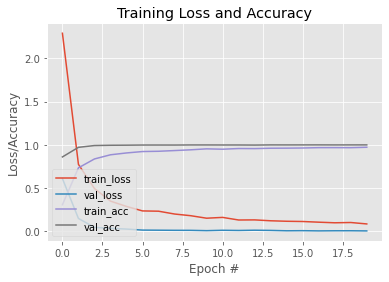

In [19]:
import matplotlib.pyplot as plt
N = 20
H=history
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('evaluation.png')

Test the Model


In [20]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('/content/drive/MyDrive/Real-Time-Communication-System-For-Disabled/RTCS_classifier.h5')

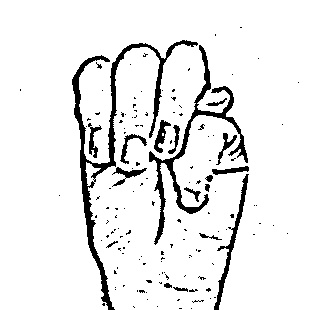

In [22]:
img=image.load_img(r"/content/drive/MyDrive/Real-Time-Communication-System-For-Disabled/DATASET/train/M/120.jpg")
img

In [23]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x.shape


(1, 310, 310, 3)

In [24]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Real-Time-Communication-System-For-Disabled/DATASET/train/M/120.jpg',cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img,(128,128),1)

img=np.expand_dims(img,axis=0)

In [25]:
pred=model.predict(img)
pred

1/1 [==============================] - 0s 146ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
labels_dict = {0:'0', 
                 1:'A', 
                 2:'B', 
                 3:'C', 
                 4:'D', 
                 5:'E',
                 6:'F',
                 7:'G',
                 8:'H',
                 9:'I',
                 10:'J',
                 11:'K',
                 12:'L',
                 13:'M',
                 14:'N',
                 15:'O',
                 16:'P',
                 17:"Q",
                 18:'R',
                 19:'S',
                 20:'T', 
                 21:'U', 
                 22:'V',
                 23:'W',
                 24:'X',
                 25:'Y',
                 26:'Z'}

In [27]:
key = np.argmax(pred)
labels_dict.get(key)

'S'